This code is written to plot the results for the EnKF for both linear and nonlinear setting. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
N_m_v_list=[20,25,30]
N_m_theta_list=[20,25,30]
index=0
Obs_linear=0
N_t=4000
m=80
sigma_kernel=2000
gamma_ratio=0.0001*5
N_m_v=N_m_v_list[index]
N_m_theta=N_m_theta_list[index]
t_yr=365*24*3600
version=2024.11
number=102
N_subplots=4

In [3]:
# INVERSION: importing the inversion results
# The data is saved using this line of code:
# np.savez("/central/groups/astuart/hkaveh/Data/LearnROM/EnKF_N_m_v"+str(N_m_v)+"N_m_theta"+str(N_m_theta)+"Obs_linear"+str(Obs_linear)+"N_t"+str(N_t)+"m"+str(m)+"sigma_kernel"+str(sigma_kernel)+"gamma_ratio"+str(gamma_ratio)+"version"+str(version)+"NumberinDataset"+str(number),alpha_a=alpha_a,alpha_f=alpha_f,Innovations=Innovations,time=time,y_obs=y_obs[:,:N_t],X_uniform=X_uniform[:N_t,:],t_0=t_0,number=number)
# now we load the data

data=np.load("/central/groups/astuart/hkaveh/Data/LearnROM/EnKF_N_m_v"+str(N_m_v)+"N_m_theta"+str(N_m_theta)+"Obs_linear"+str(Obs_linear)+"N_t"+str(N_t)+"m"+str(m)+"sigma_kernel"+str(sigma_kernel)+"gamma_ratio"+str(gamma_ratio)+"version"+str(version)+"NumberinDataset"+str(number)+'.npz')
alpha_a=data['alpha_a']
alpha_f=data['alpha_f']
Innovations=data['Innovations']
time=data['time']
y_obs=data['y_obs']
X_uniform=data['X_uniform']
t_0_inversion=data['t_0']
theta_data=X_uniform[:,N_m_v:].T
end_time=time[-1]/t_yr

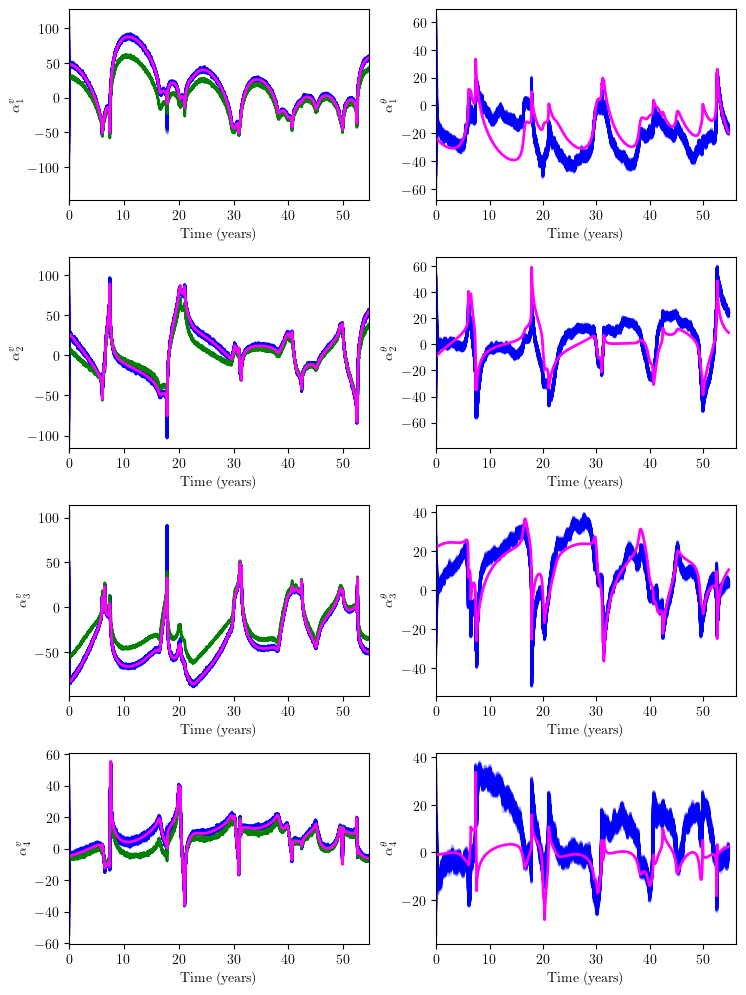

In [4]:
# Postprocessing and plotting the the behavior of the EnKF
# One natural figure to think of is plotting the first four dims of observation and the first four dims of the EnKF for all members
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,  # If you want to use LaTeX for rendering text
})

fig, axs = plt.subplots(N_subplots, 2, figsize=(7.5, N_subplots*2.5))
# adjust the font size for anything in this figure

# Flatten the axs array so that we can iterate over it easily
plt.rcParams.update({'font.family': 'serif', 'font.serif': 'Times New Roman','font.size': 8})

# Plot the KDE plot for each column of X_full
for i in range(N_subplots):
    for j in range(m-1):
        axs[i,0].plot(time/3600/24/365,alpha_a[i,j,:],color='b',alpha=0.2,linewidth=2)
    axs[i,0].plot(time/3600/24/365,alpha_a[i,-1,:],color='b',alpha=0.2,label='Ensemble Members',linewidth=2)

    axs[i,0].plot(time/3600/24/365,y_obs[i,:N_t],label='Observation',color='green',linewidth=2)
    axs[i,0].plot(time/3600/24/365,X_uniform[:N_t,i],label='True State',color='Magenta',linewidth=2)

    axs[i,0].set_ylabel(r'$\alpha^v_{{{}}}$'.format(i+1))
    axs[i,0].set_xlim(left=0)
    # axs[i,0].legend(ncol=2)
    axs[i,0].set_xlabel('Time (years)')
    axs[i,0].set_xlim(right=time[-1]/3600/24/365)
    # leg = axs[i].legend()
    # for lh in leg.legendHandles:
    #       lh.set_alpha(1)


for i in range(N_subplots):
    for j in range(m-1):
        axs[i,1].plot(time/3600/24/365,alpha_a[i+N_m_v,j,:],color='b',alpha=0.2,linewidth=2)
    axs[i,1].plot(time/3600/24/365,alpha_a[i+N_m_v,-1,:],color='b',alpha=0.2,label='Ensemble Members',linewidth=2)
    axs[i,1].plot(time/3600/24/365,theta_data[i,:N_t],label='True State',color='magenta',linewidth=2)
    axs[i,1].set_ylabel(r'$\alpha^\theta_{{{}}}$'.format(i+1))
    axs[i,1].set_xlim(left=0)
    # axs[i,1].legend(ncol=2)
    axs[i,1].set_xlabel('Time (years)')
    axs[i,1].set_xlim(right=time[-1]/3600/24/356)

    # leg = axs[i].legend()
    # for lh in leg.legendHandles:
    #       lh.set_alpha(1)
plt.tight_layout()
plt.show()
# save the figure in the central directory
fig.savefig("/central/groups/astuart/hkaveh/Figs/ROM/EnKF"+"dim"+str(N_m_v)+"Obs_linear"+str(Obs_linear)+".png",dpi=300, bbox_inches='tight')
